In [40]:
# Task 1: Titanic Survival Prediction - CodSoft Internship

# 1.1 Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Load Dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
## 1.2 Understand the Dataset

#Information about the Dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [42]:
# Datatypes Present in the Dataset
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [43]:
# Shape of the Dataset
print(df.shape)

(891, 12)


In [44]:
#Summary of the Dataset
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [45]:
# Checking For Missing Values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [46]:
# Column Headings
print(df.columns.to_list())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [47]:
#  Checking For Duplicate Values
print(df.duplicated().sum())

0


In [48]:
# 1.3 Data Cleaning

# Fill Misssing Values using Fillna()
df['Age'] = df['Age'].fillna(df['Age'].mean())




# Checking for Missed Values in Age column after using Fillna()
print(df['Age'].isnull().sum())  # Should be 0 if all were filled


0


In [49]:
# Filling Embarked column using Fillna()
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Checking for Missed Values in Embarked column after using Fillna()
print(df['Embarked'].isnull().sum())




0


In [50]:
# Drop the Cabin column because of excessive missing values
df = df.drop('Cabin', axis=1)
print(df.columns.to_list())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [51]:
#Dropping irrevelant columns
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
print(df.columns.to_list())

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


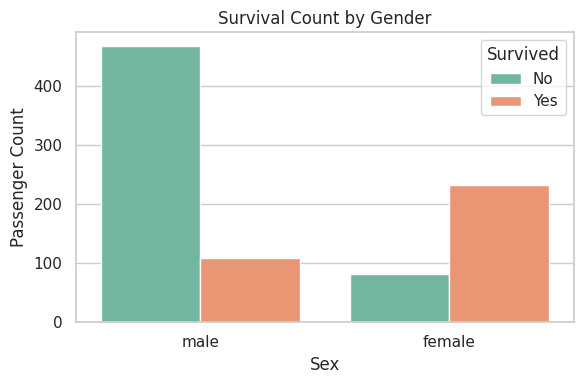

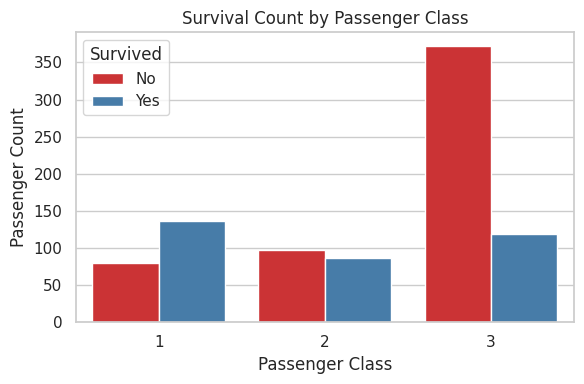

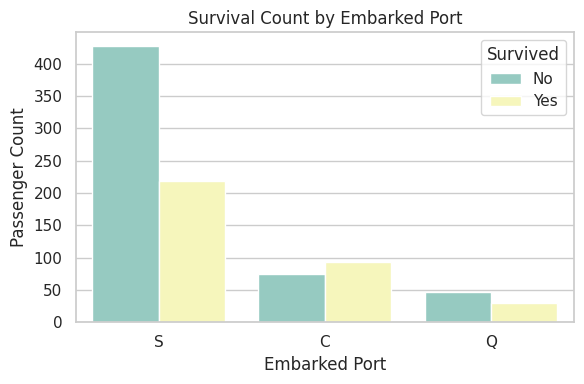

In [52]:
# 1.4 Exploratory Data Analysis

# Univariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Survived by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


# Countplot for Survived in different Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


# Countplot for Embarked
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set3')
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()



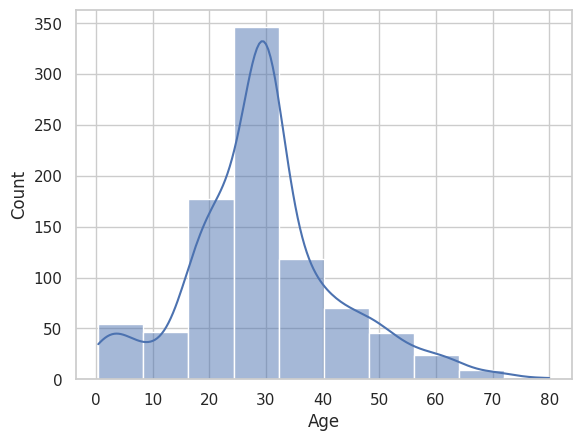

In [53]:
# Plotting Histogram
sns.histplot(df['Age'], kde=True, bins=10)
plt.show()


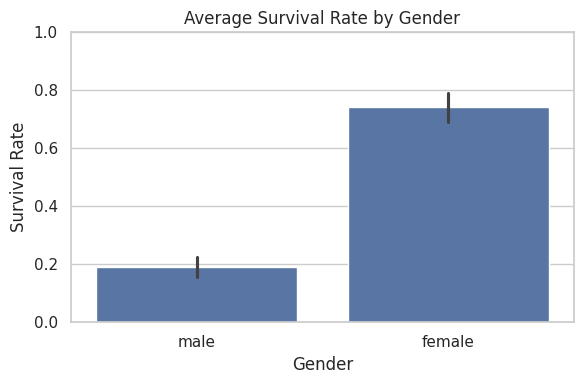

In [54]:
# Bivariate Analysis

# Survival rate of Gender by using Barplot
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Average Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()




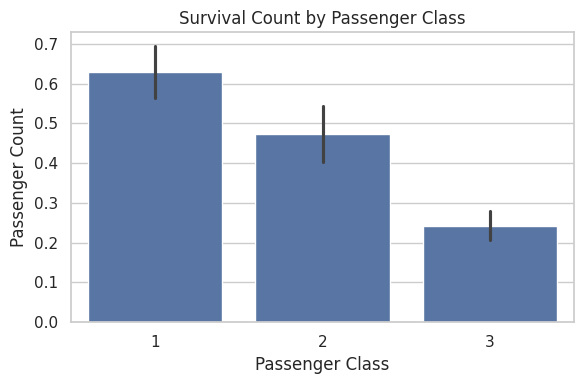

In [55]:
# Survival rate of Passenger Class by using Barplot
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()


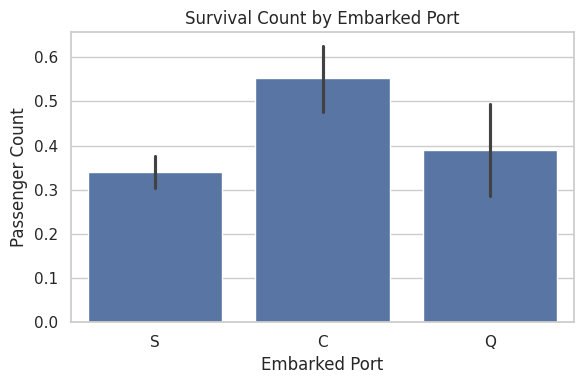

In [56]:
# Survival rate of Embarked by using Barplot
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

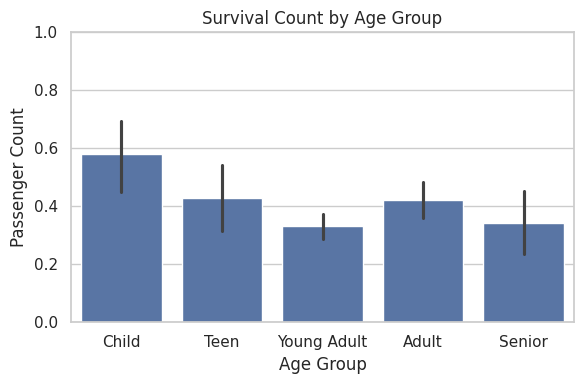

In [57]:
# # Survival rate of Age Groups by using Barplot
# Define age groups
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create a new column for age group
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(6,4))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Passenger Count')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

In [58]:
# 1.5 Feature Engineering
# Encode Sex Column to numbers

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [59]:
# One-hot encoding: creates separate columns for each category (S, C, Q)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [60]:
# Create FamilySize Feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [61]:
# Create IsAlone Feature
df['IsAlone'] = 0  # Default: Not alone
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1  # If FamilySize is 1, then alone


In [62]:
# One-hot encode AgeGroup
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)

In [63]:
# Bin Fare Into Quartiles
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])


In [64]:
cols_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch']

# Drop only the columns that exist in df
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [65]:
# 1.6 Model Building

# Model 1: Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [66]:
# Define Features (X) and Target (y)
X=df.drop('Survived',axis=1)
y=df['Survived']

# Split the dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [67]:
# Model Training
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [68]:
# Model Prediction
y_pred = model.predict(X_test)


In [69]:
# 1.7 Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
 [[91 14]
 [19 55]]


In [70]:
#Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Prediction
rf_pred = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))




Random Forest Accuracy: 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
 [[91 14]
 [17 57]]


In [71]:
# Comparison of both models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Logistic Regression Accuracy: 0.8156424581005587
Random Forest Accuracy: 0.8268156424581006


In [72]:
import pandas as pd

#  Input passenger details (13 values in order)
pclass = int(input("Pclass (1/2/3): "))
sex = int(input("Sex (0 = female, 1 = male): "))
age = float(input("Age: "))
fare = float(input("Fare: "))
embarked_q = int(input("Embarked_Q (1 if Embarked at Q else 0): "))
embarked_s = int(input("Embarked_S (1 if Embarked at S else 0): "))
family_size = int(input("FamilySize: "))
is_alone = int(input("IsAlone (1 if no family else 0): "))
age_teen = int(input("AgeGroup_Teen (1 or 0): "))
age_young_adult = int(input("AgeGroup_Young Adult (1 or 0): "))
age_adult = int(input("AgeGroup_Adult (1 or 0): "))
age_senior = int(input("AgeGroup_Senior (1 or 0): "))
fare_bin = int(input("FareBin (Fare Bin group index): "))

#  Create DataFrame with user input
input_data = pd.DataFrame([[
    pclass, sex, age, fare, embarked_q, embarked_s,
    family_size, is_alone, age_teen, age_young_adult,
    age_adult, age_senior, fare_bin
]], columns=[
    'Pclass', 'Sex', 'Age', 'Fare',
    'Embarked_Q', 'Embarked_S',
    'FamilySize', 'IsAlone',
    'AgeGroup_Teen', 'AgeGroup_Young Adult',
    'AgeGroup_Adult', 'AgeGroup_Senior',
    'FareBin'
])

#  Prediction using trained Random Forest model
prediction = rf_model.predict(input_data)[0]

#  Output
print("\n🎯 Prediction Result:")
print("✅ Survived" if prediction == 1 else "❌ Did Not Survive")


Pclass (1/2/3): 1
Sex (0 = female, 1 = male): 1
Age: 19
Fare: 80
Embarked_Q (1 if Embarked at Q else 0): 0
Embarked_S (1 if Embarked at S else 0): 1
FamilySize: 5
IsAlone (1 if no family else 0): 0
AgeGroup_Teen (1 or 0): 1
AgeGroup_Young Adult (1 or 0): 1
AgeGroup_Adult (1 or 0): 0
AgeGroup_Senior (1 or 0): 2
FareBin (Fare Bin group index): 3

🎯 Prediction Result:
✅ Survived
